In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv("Demand_History.csv")

In [4]:
data.head()

demand_point_index  x_coordinate  y_coordinate      2010      2011  \
0                   0           0.5           0.5  0.352242  0.667932   
1                   1           1.5           0.5  0.325940  0.591964   
2                   2           2.5           0.5  0.373752  0.591890   
3                   3           3.5           0.5  0.420686  0.584055   
4                   4           4.5           0.5  0.475621  0.647940   

       2012      2013      2014      2015      2016       2017       2018  
0  0.958593  2.911901  4.338274  6.561995  8.454417  10.595324  13.119572  
1  0.862652  2.589068  4.196034  5.745551  8.753195  11.126995  12.020091  
2  0.969733  2.641432  3.541772  5.469161  8.414627  10.115336  14.018254  
3  0.906547  2.378577  3.888121  5.846089  9.083868  12.424885  15.012302  
4  0.981544  2.665400  4.218711  6.776609  8.851107  11.731131  16.355563

In [5]:
cols = data.columns[3:]

In [6]:
x = np.array(data.iloc[0,3:])

In [7]:
print(x)

[ 0.3522418   0.66793169  0.95859331  2.91190058  4.33827422  6.56199463
  8.45441738 10.59532421 13.11957206]


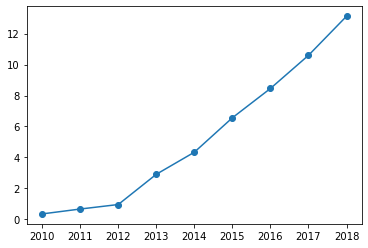

In [8]:
plt.plot(cols,x)
plt.scatter(cols,x)
plt.show()

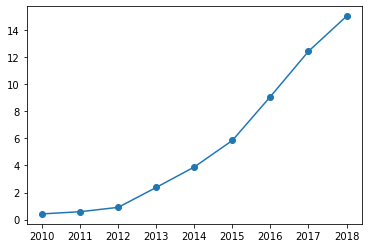

In [9]:
x = np.array(data.iloc[3,3:])
plt.plot(cols,x)
plt.scatter(cols,x)
plt.show()

In [10]:
df = []
for i in range(4096):
    df.append(np.array(data.iloc[i,3:]))


In [11]:
df = pd.DataFrame(df)

<AxesSubplot:>

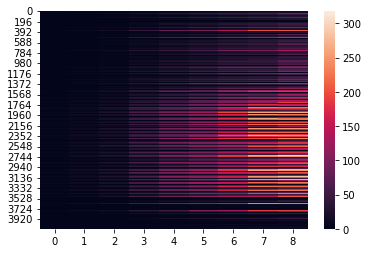

In [12]:
sns.heatmap(df)

In [13]:
df.sort_values(8)

0          1          2          3           4           5  \
173   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
108   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
3458  0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
3459  0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
3150  0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
...        ...        ...        ...        ...         ...         ...   
2401  5.393450  14.111437  27.408534  59.199085  106.707291  123.501021   
1775  5.730067  12.151694  22.277872  55.247481   99.617097  111.967034   
2853  5.305093  13.510516  20.908841  46.743812   98.048018  127.156351   
2402  6.100798  14.259631  26.989022  62.797020  117.063595  128.521896   
2330  5.590449  13.494083  27.537494  66.582034  114.672502  148.491476   

               6           7           8  
173     0.000000    0.000000    0.000000  
108     0.000000    0.000000    0.000000  
3458    0.000000    0.000000    0.000000  
3459    0.000000    0.000000    0.000000  
3150    0.000000    0.000000    0.000000  
...          ...         ...         ...  
2401  219.652855  283.812867  297.762105  
1775  154.669629  248.209484  303.544739  
2853  183.634538  246.400964  309.222623  
2402  192.689481  281.136558  312.010208  
2330  198.706412  302.729826  317.422418  

[4096 rows x 9 columns]

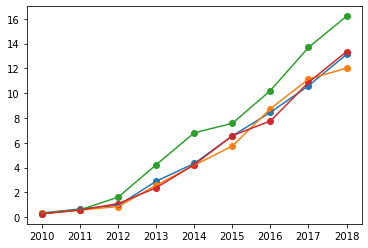

In [14]:
for i in [0,1,64,65]:
    x = np.array(data.iloc[i,3:])
    plt.plot(cols,x)
    plt.scatter(cols,x)
plt.show()    

In [15]:
year = []
for i in range(len(df.columns)):
    year.append(df.iloc[:,i].sum())

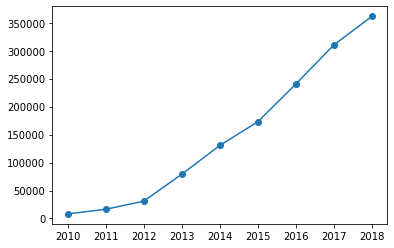

In [16]:
plt.plot(cols,year)
plt.scatter(cols,year)
plt.show()

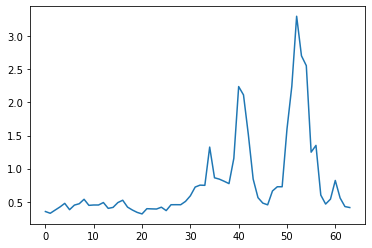

In [17]:
plt.plot(range(0,64),df.iloc[:64,0])
# plt.scatter(range(0,32),df.iloc[:32,0])
plt.show()

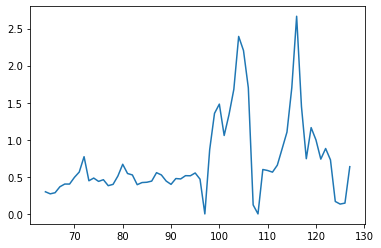

In [18]:
plt.plot(range(64,128),df.iloc[64:128,0])
# plt.scatter(range(0,32),df.iloc[:32,0])
plt.show()

In [20]:
df = df.to_numpy()

In [21]:
index = np.zeros(4096)
d_2019 = np.zeros(4096)
d_2020 = np.zeros(4096)
indices = np.zeros(4096).reshape(64,64)

In [22]:
for i in range(4096):
    indices[i//64,i%64] = i 

In [23]:
import darts
import darts.models
from IPython.display import clear_output
from darts import TimeSeries
# Dividing the demand points grid into blocks of 4*4

i = 0
j = 0
while(j<48):
    if(i==60):
        j += 4 
        i = 0
        print(j)
    X = [indices[i,j],indices[i+1,j],indices[i+2,j],indices[i+3,j],indices[i,j+1],indices[i+1,j+1],indices[i+2,j+1],indices[i+3,j+1],indices[i,j+2],indices[i+1,j+2],indices[i+2,j+2],indices[i+3,j+2],indices[i,j+3],indices[i+1,j+3],indices[i+2,j+3],indices[i+3,j+3]]
    dx = pd.DataFrame([df[int(indices[i,j]),:],df[int(indices[i+1,j]),:],df[int(indices[i+2,j]),:],df[int(indices[i+3,j]),:],df[int(indices[i,j+1]),:],df[int(indices[i+1,j+1]),:],df[int(indices[i+2,j+1]),:],df[int(indices[i+3,j+1]),:],df[int(indices[i,j+2]),:],df[int(indices[i+1,j+2]),:],df[int(indices[i+2,j+2]),:],df[int(indices[i+3,j+2]),:],df[int(indices[i,j+3]),:],df[int(indices[i+1,j+3]),:],df[int(indices[i+2,j+3]),:],df[int(indices[i+3,j+3]),:]]).T
    dx = TimeSeries.from_dataframe(dx)
    nb = darts.models.forecasting.nbeats.NBEATSModel(3, 2, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation='ReLU')
    nb.fit(dx)
    t = nb.predict(2).all_values()
    y = 0
    for x in X:
        d_2019[int(x)] += t[0,y,0]
        d_2020[int(x)] += t[1,y,0]
        y += 1
    clear_output()
    i+=4

4
8
12
16
20
24
28
32
36
40
44
48


In [ ]:
print(d_2019)

In [ ]:
print(d_2020)

In [ ]:
fig = plt.figure(figsize=(64,64))
plt.plot(range(0,4096),d_2019)
plt.plot(range(0,4096),df[:,8])
# plt.scatter(range(0,32),df.iloc[:32,0])
plt.show()

In [ ]:
print(d_2019)

In [ ]:
nbeats = pd.DataFrame([d_2019,d_2020])
nbeats.to_csv("nbeats.csv")

In [24]:
# due to computational limits the training is done in two separate runs
while(j<64):
    if(i==60):
        j += 4 
        i = 0
        print(j)
        if(j==64): break
    X = [indices[i,j],indices[i+1,j],indices[i+2,j],indices[i+3,j],indices[i,j+1],indices[i+1,j+1],indices[i+2,j+1],indices[i+3,j+1],indices[i,j+2],indices[i+1,j+2],indices[i+2,j+2],indices[i+3,j+2],indices[i,j+3],indices[i+1,j+3],indices[i+2,j+3],indices[i+3,j+3]]
    dx = pd.DataFrame([df[int(indices[i,j]),:],df[int(indices[i+1,j]),:],df[int(indices[i+2,j]),:],df[int(indices[i+3,j]),:],df[int(indices[i,j+1]),:],df[int(indices[i+1,j+1]),:],df[int(indices[i+2,j+1]),:],df[int(indices[i+3,j+1]),:],df[int(indices[i,j+2]),:],df[int(indices[i+1,j+2]),:],df[int(indices[i+2,j+2]),:],df[int(indices[i+3,j+2]),:],df[int(indices[i,j+3]),:],df[int(indices[i+1,j+3]),:],df[int(indices[i+2,j+3]),:],df[int(indices[i+3,j+3]),:]]).T
    dx = TimeSeries.from_dataframe(dx)
    nb = darts.models.forecasting.nbeats.NBEATSModel(3, 2, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation='ReLU')
    nb.fit(dx)
    t = nb.predict(2).all_values()
    y = 0
    for x in X:
        d_2019[int(x)] += t[0,y,0]
        d_2020[int(x)] += t[1,y,0]
        y += 1
#     clear_output()
    i+=4

2022-10-02 15:07:27 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:07:27 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:07:27 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:07:28 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:07:46 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:07:46 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:07:46 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:07:47 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:08:04 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:08:04 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:08:04 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:08:04 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:08:21 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:08:21 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:08:21 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:08:21 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:08:37 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:08:37 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:08:37 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:08:37 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:08:55 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:08:55 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:08:55 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:08:55 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:09:12 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:09:12 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:09:12 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:09:12 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:09:28 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:09:28 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:09:28 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:09:29 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:09:57 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:09:57 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:09:57 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:09:57 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:10:19 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:10:19 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:10:19 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:10:19 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:10:40 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:10:40 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:10:40 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:10:40 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:11:04 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:11:04 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:11:04 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:11:04 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:11:24 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:11:24 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:11:24 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:11:24 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:11:42 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:11:42 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:11:42 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:11:42 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:12:01 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:12:01 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:12:01 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:12:01 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


52


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:12:18 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:12:18 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:12:18 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:12:18 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:12:36 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:12:36 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:12:36 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:12:36 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:12:52 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:12:52 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:12:52 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:12:52 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:13:09 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:13:09 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:13:09 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:13:09 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:13:33 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:13:33 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:13:33 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:13:33 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:13:53 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:13:53 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:13:53 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:13:53 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:14:12 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:14:12 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:14:12 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:14:12 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:14:32 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:14:32 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:14:32 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:14:32 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:14:56 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:14:56 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:14:56 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:14:56 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:15:31 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:15:31 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:15:31 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:15:31 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:16:17 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:16:17 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:16:17 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:16:18 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:16:56 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:16:56 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:16:56 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:16:57 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:17:32 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:17:32 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:17:32 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:17:33 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:17:58 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:17:58 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:17:58 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:17:58 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:18:26 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:18:26 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:18:26 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs


56


2022-10-02 15:18:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:18:56 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:18:56 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:18:56 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:18:56 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:19:28 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:19:28 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:19:28 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:19:28 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:19:59 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:19:59 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:19:59 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:20:00 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:20:25 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:20:25 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:20:25 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:20:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:20:50 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:20:50 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:20:50 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:20:51 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:21:15 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:21:15 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:21:15 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:21:15 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:21:38 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:21:38 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:21:38 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:21:38 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:22:01 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:22:01 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:22:01 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:22:01 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:22:23 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:22:23 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:22:23 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:22:23 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:22:48 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:22:48 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:22:48 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:22:48 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:23:18 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:23:18 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:23:18 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:23:18 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:23:44 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:23:44 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:23:44 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:23:44 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:24:08 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:24:08 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:24:08 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:24:08 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:24:28 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:24:28 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:24:28 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:24:28 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:24:47 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:24:47 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:24:47 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs


60


2022-10-02 15:24:48 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:25:13 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:25:13 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:25:13 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:25:14 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:25:38 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:25:38 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:25:38 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:25:39 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:26:03 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:26:03 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:26:03 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:26:04 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:26:25 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:26:25 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:26:25 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:26:26 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:26:51 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:26:51 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:26:51 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:26:51 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:27:15 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:27:15 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:27:15 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:27:15 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:27:38 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:27:38 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:27:38 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:27:38 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:28:03 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:28:03 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:28:03 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:28:03 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:28:39 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:28:39 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:28:39 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:28:39 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:29:05 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:29:05 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:29:05 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:29:05 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:29:30 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:29:30 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:29:30 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:29:30 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:30:14 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:30:14 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:30:14 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:30:14 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:30:41 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:30:41 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:30:41 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:30:41 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

2022-10-02 15:31:20 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2022-10-02 15:31:20 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-10-02 15:31:20 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-10-02 15:31:20 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.113    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

64


In [28]:
pd.DataFrame(d_2019).sum()

0    103542.383392
dtype: float64

In [29]:
print(df[:,8])

[13.11957206 12.02009087 14.01825375 ...  3.21851858  6.26257382
  6.86093937]


In [34]:
l = []
for i in range(4096):
    if(d_2019[i]!=0):
        l.append(i)        

In [35]:
print(l)

[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 8

In [33]:
print(len(l))

3152


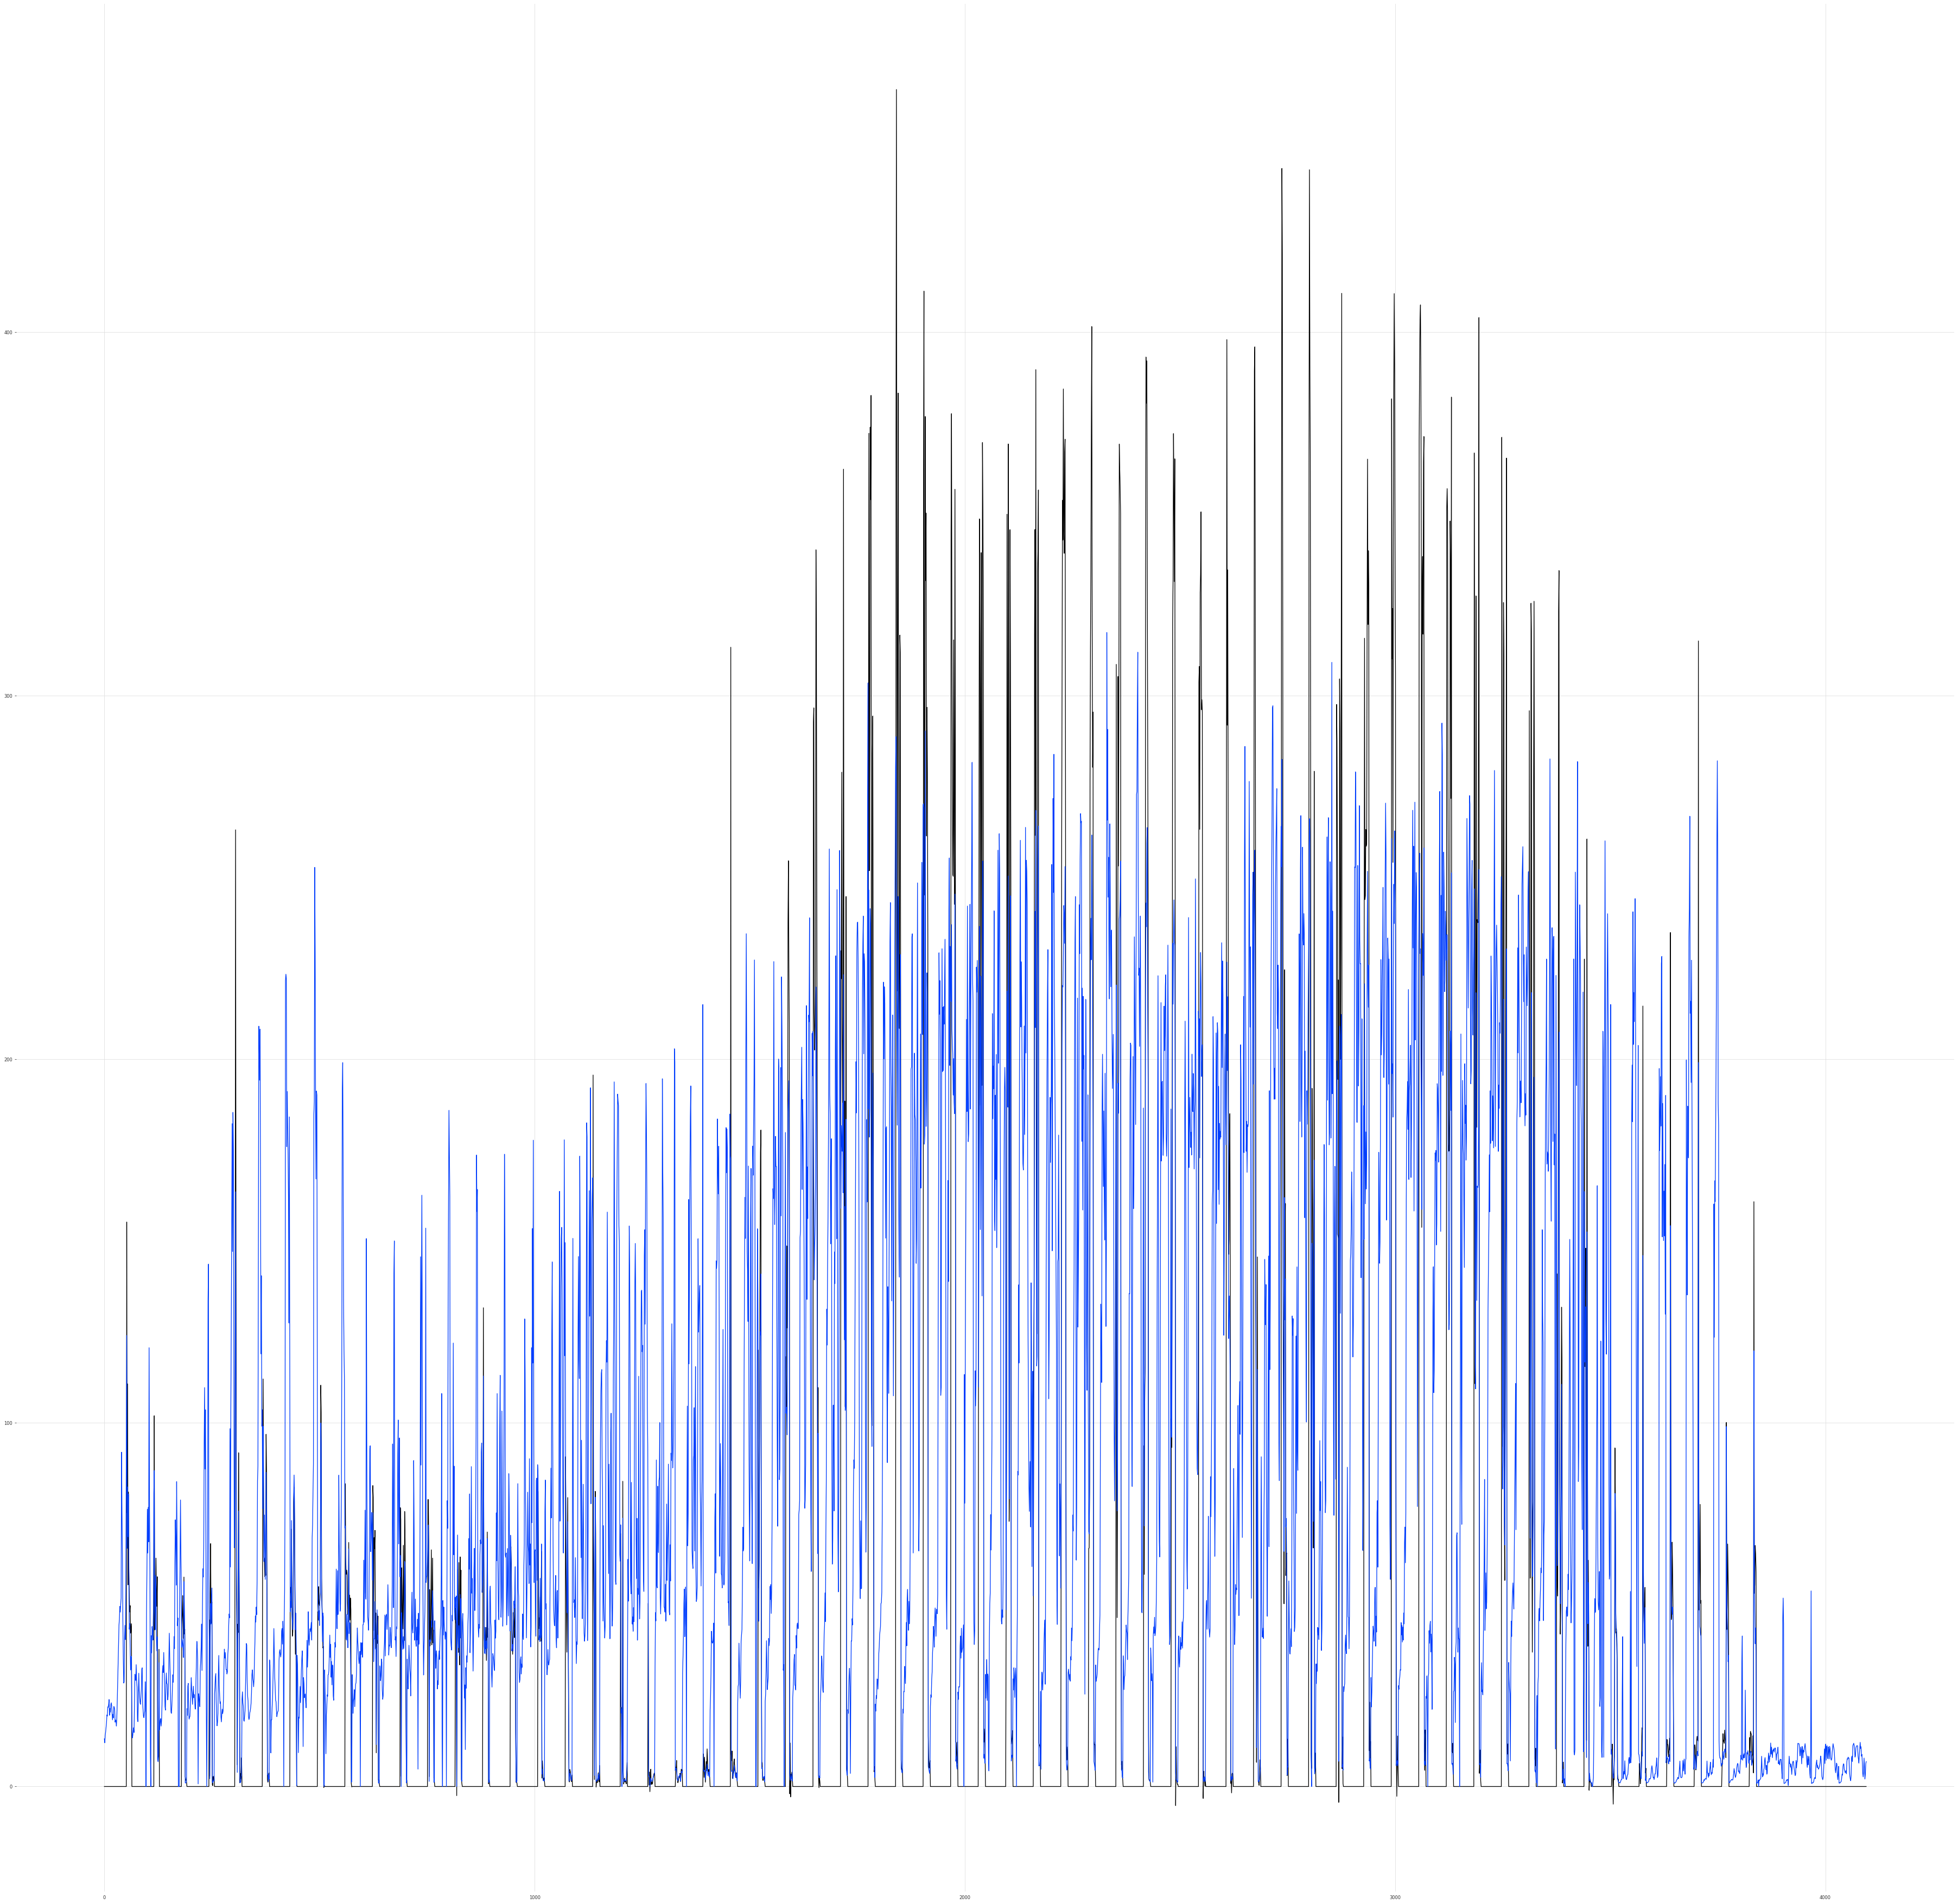

In [36]:
fig = plt.figure(figsize=(64,64))
plt.plot(range(0,4096),d_2019)
plt.plot(range(0,4096),df[:,8])
# plt.scatter(range(0,32),df.iloc[:32,0])
plt.show()

In [37]:
i = 60
j = 0
while(j<64):
    
    X = [indices[i,j],indices[i+1,j],indices[i+2,j],indices[i+3,j],indices[i,j+1],indices[i+1,j+1],indices[i+2,j+1],indices[i+3,j+1],indices[i,j+2],indices[i+1,j+2],indices[i+2,j+2],indices[i+3,j+2],indices[i,j+3],indices[i+1,j+3],indices[i+2,j+3],indices[i+3,j+3]]
    dx = pd.DataFrame([df[int(indices[i,j]),:],df[int(indices[i+1,j]),:],df[int(indices[i+2,j]),:],df[int(indices[i+3,j]),:],df[int(indices[i,j+1]),:],df[int(indices[i+1,j+1]),:],df[int(indices[i+2,j+1]),:],df[int(indices[i+3,j+1]),:],df[int(indices[i,j+2]),:],df[int(indices[i+1,j+2]),:],df[int(indices[i+2,j+2]),:],df[int(indices[i+3,j+2]),:],df[int(indices[i,j+3]),:],df[int(indices[i+1,j+3]),:],df[int(indices[i+2,j+3]),:],df[int(indices[i+3,j+3]),:]]).T
    dx = TimeSeries.from_dataframe(dx)
    nb = darts.models.forecasting.nbeats.NBEATSModel(3, 2, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation='ReLU')
    nb.fit(dx)
    t = nb.predict(2).all_values()
    y = 0
    for x in X:
        d_2019[int(x)] += t[0,y,0]
        d_2020[int(x)] += t[1,y,0]
        y += 1
    clear_output()
    j+=4

In [94]:
nt = pd.read_csv("nbeats.csv")

In [95]:
print(nt)

           0          1          2          3          4          5  \
0  16.510711  18.846287  16.042624  19.985781  18.730846  25.044350   
1  22.027955  18.269391  21.742603  24.266968  27.517960  30.172353   

           6          7          8          9  ...  4086  4087  4088  4089  \
0  19.597160  24.379026  29.561006  29.720055  ...     0     0     0     0   
1  31.111202  31.028574  36.439743  38.209034  ...     0     0     0     0   

   4090  4091  4092  4093  4094  4095  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  

[2 rows x 4096 columns]


In [96]:
print(d_2019)

[0.         0.         0.         ... 4.59115553 9.94383841 9.29268219]


In [97]:
d_2019 = np.array(d_2019)
d_2019_p = np.array(nt.loc[0,:])
d_2019_p = d_2019_p

In [98]:
print(d_2019)

[0.         0.         0.         ... 4.59115553 9.94383841 9.29268219]


In [99]:
print(d_2019_p)

[16.51071066 18.84628725 16.04262365 ...  0.          0.
  0.        ]


In [100]:
d_scaled_2019 = d_2019 + d_2019_p

In [101]:
print(d_scaled_2019.shape)

(4096,)


In [102]:
l = []
for i in range(4096):
    if(d_scaled_2019[i]==0):
        l.append(i)

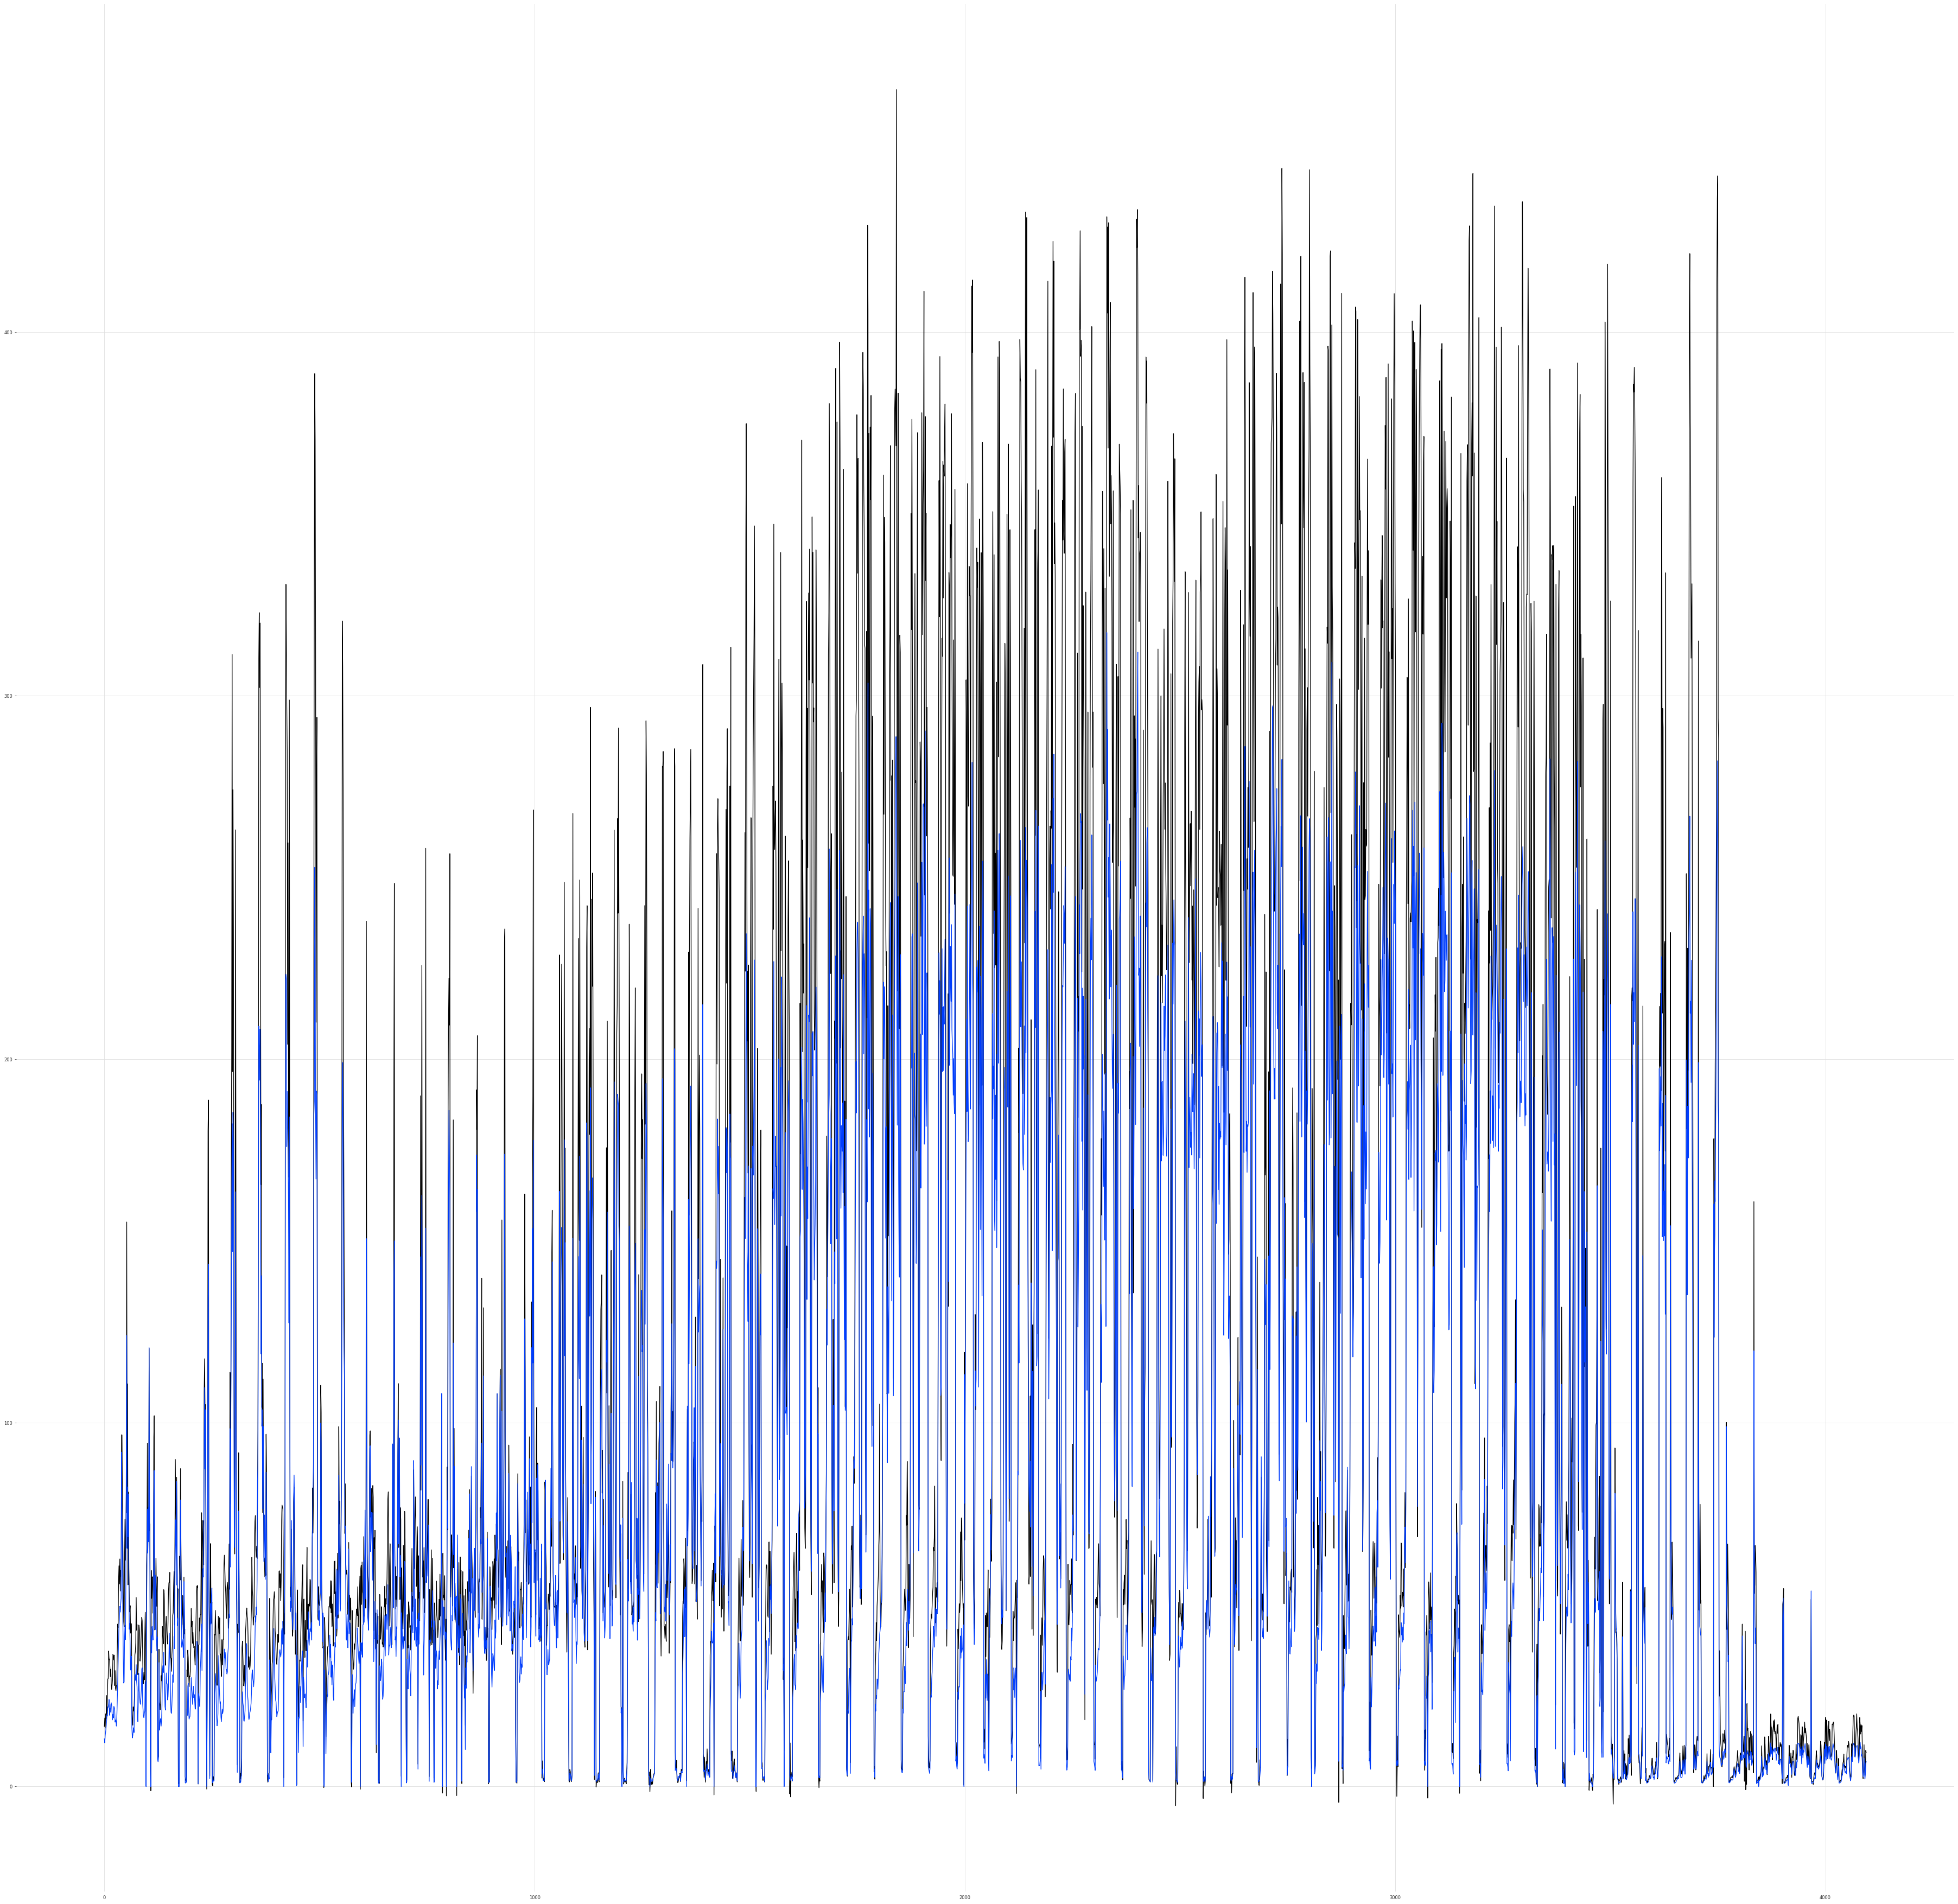

In [103]:
fig = plt.figure(figsize=(64,64))
plt.plot(range(0,4096),d_scaled_2019)
plt.plot(range(0,4096),df[:,8])
# plt.scatter(range(0,32),df.iloc[:32,0])
plt.show()

In [104]:
dxx = pd.DataFrame(d_scaled_2019)

In [105]:
dxx.to_csv("final_value.csv")

In [106]:
d_2020 = np.array(d_2020)
d_2020_p = np.array(nt.loc[1,:])
d_2020_p = d_2020_p

In [107]:
d_scaled_2020 = d_2020 + d_2020_p

In [112]:
dx = pd.read_csv("Demand_History.csv")
dx['2019'] = d_scaled_2019
dx['2020'] = d_scaled_2020

In [115]:
# Final predicted demand
dx.to_csv('Demand_predicted_nbeats.csv')